In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1985 - accuracy: 0.9397
Epoch 2/6
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0805 - accuracy: 0.9752
Epoch 3/6
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0512 - accuracy: 0.9836
Epoch 4/6
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0397 - accuracy: 0.9873
Epoch 5/6
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0294 - accuracy: 0.9903
Epoch 6/6
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0228 - accuracy: 0.9920


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0952 - accuracy: 0.9784
0.09523428976535797 0.9783999919891357


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/My Drive/numder_identifier_model.model')

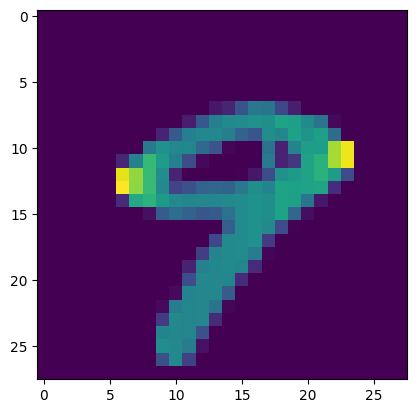

313/313 [==============================] - 1s 3ms/step
9


In [ ]:
plt.imshow(x_test[9])
plt.show()
prediction = model.predict([x_test])
import numpy as np
print(np.argmax(prediction[9]))

In [ ]:
pip install opencv-python


1/1 [==============================] - 0s 76ms/step
Predicted class: 8


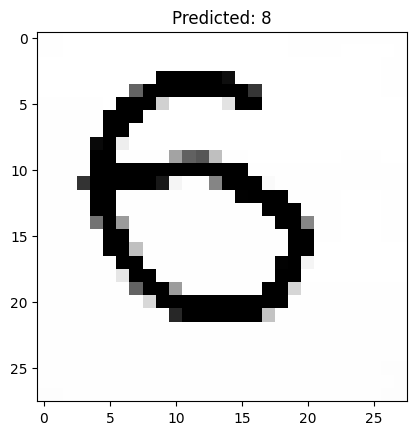

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your hand-drawn digit image
image_path = '/content/pic3.png'  # Update this with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Resize the image to 28x28 pixels
image_resized = cv2.resize(image, (28, 28))

# Normalize the pixel values to be between 0 and 1
image_normalized = image_resized / 255.0


# Expand dimensions to match the input shape of the model (1, 28, 28)
input_image = np.expand_dims(image_normalized, axis=0)

# Load the trained model (assuming you already have the model loaded as `model`)
# If not, load it using `model = tf.keras.models.load_model('path_to_your_saved_model')`

# Make the prediction
prediction = model.predict(input_image)

# Print the predicted class
print("Predicted class:", np.argmax(prediction[0]))

# Plot the image
plt.imshow(image_normalized, cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction[0])}")
plt.show()


TypeError: Invalid shape (1, 28, 28) for image data

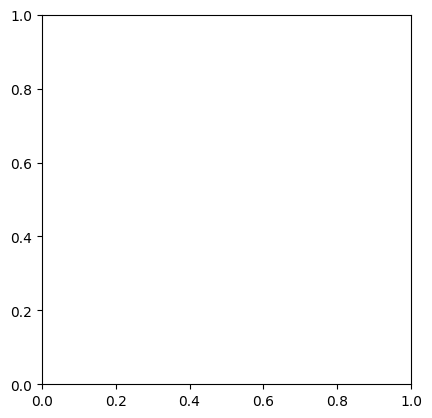

In [ ]:
image_path = '/content/pic5.png'  # Update this with your image path
image = cv2.imread(image_path)[:,:,0]  # Read the image in grayscale

# Resize the image to 28x28 pixels
image_resized = cv2.resize(image, (28, 28))
plt.imshow(image_resized)
plt.show()
image_resized = np.invert(np.array([image_resized]))
prediction = model.predict([image_resized])
import numpy as np
print(np.argmax(prediction))

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the hand-drawn digit image
image_path = '/mnt/data/pic3.png'  # Update this with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Check if image is loaded properly
if image is None:
    print("Error loading image!")
else:
    # Invert the image to match MNIST's white-on-black format
    image_inverted = cv2.bitwise_not(image)

    # Resize the image to 28x28 pixels
    image_resized = cv2.resize(image_inverted, (28, 28))

    # Normalize the pixel values to be between 0 and 1
    image_normalized = image_resized / 255.0

    # Expand dimensions to match the input shape of the model (1, 28, 28)
    input_image = np.expand_dims(image_normalized, axis=0)

    # Expand dimensions to match the input shape of the model (1, 28, 28, 1)
    input_image = np.expand_dims(input_image, axis=-1)

    # Plot the preprocessed image
    plt.imshow(image_normalized, cmap='gray')
    plt.title("Preprocessed Image")
    plt.show()

    # Make the prediction
    prediction = model.predict(input_image)

    # Print the predicted class
    predicted_class = np.argmax(prediction[0])
    print("Predicted class:", predicted_class)


Error loading image!
